

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [3]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-09-29 17:00:51--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-09-29 17:00:51--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv’

enterprise.csv      100%[==============

## Paso 0: Importar librerías y configuración

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [5]:
df = pd.read_csv("enterprise.csv")

In [6]:
df.head(10)


,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,9.176080e+04
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,1.844617e+05
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,2.332369e+04
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,1.302028e+05
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,1.147212e+04
5,31/03/2017,193930.7990,48947.873000,12210.142,20295.273,19125.69600,249584.550,1.559223e+06
6,30/06/2012,219731.6000,76841.749760,14281.800,32758.100,46280.60000,191339.100,4.798319e+05
7,31/12/2012,21193.9000,3962.154660,824.900,1021.500,3864.00000,7917.500,1.152480e+04
8,31/12/2019,63918.9000,17967.620000,3715.240,1761.299,13819.13200,20418.708,1.736553e+05
9,31/03/2017,4853.3560,656.749000,444.808,755.501,1077.98700,4666.925,1.108998e+04


### Estadísticas Descriptivas y Distribuciones

In [7]:
df.describe()

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1.061000e+03,1061.000000,1061.000000,1061.000000,1061.000000,1.061000e+03,1.061000e+03
mean,1.632727e+05,24076.406810,8002.050367,10961.602205,22324.130946,8.057162e+04,3.292238e+05
std,2.213828e+05,31871.076559,13898.135849,20250.735197,54636.421540,1.043500e+05,4.056701e+05
min,8.560000e+01,-29982.979880,-5.690000,-694.661000,-118819.899000,-1.503965e+04,3.692000e+02
25%,4.265958e+04,4522.900000,999.340000,1666.600000,3115.247000,1.689500e+04,6.981010e+04
50%,1.082011e+05,12224.611950,3446.250000,4949.447000,10736.200000,4.172290e+04,1.850416e+05
75%,1.862485e+05,32228.941870,8361.220000,11201.479000,23454.185000,1.147563e+05,4.258273e+05
max,2.586712e+06,289541.300000,128993.500000,205525.700000,623588.700000,1.009026e+06,4.175892e+06


gráfico de distribución

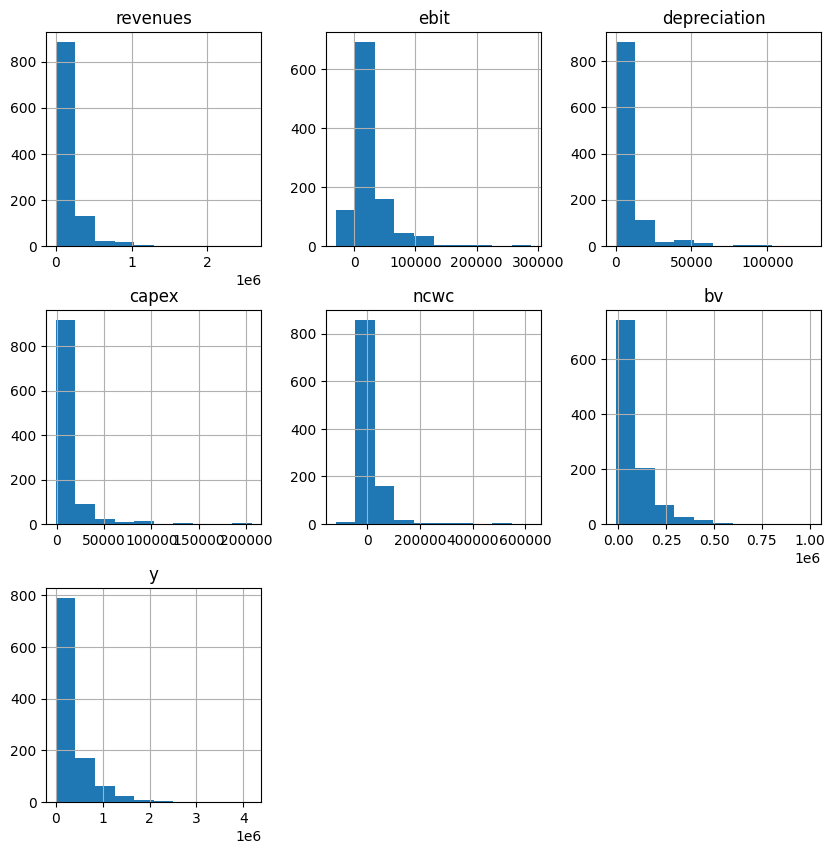

In [8]:
df.hist(figsize=(10, 10))
plt.show()


### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._


**Respuestas**
1. se trata de un problema de regresión.
2. Sí, en el análisis gráfico con boxplots se observan valores atípicos en varias variables, especialmente en revenues, bv y ncwc, que presentan valores extremadamente altos en comparación con el resto de los datos.
Estos outliers pueden afectar de manera significativa la pendiente de la recta de regresión y por ende las predicciones
3. La columna valuationdate no aporta directamente información útil, por lo que la excluiria del análisis

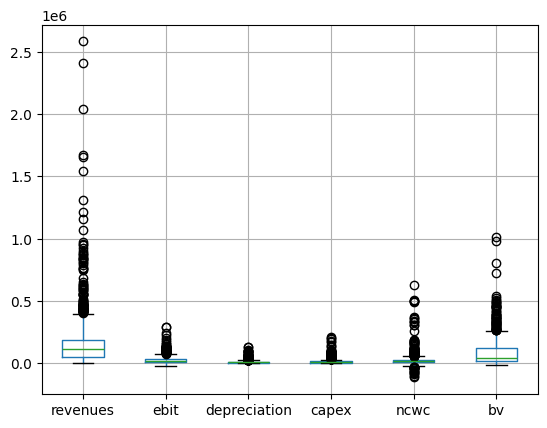

In [9]:
df.boxplot(column=["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"])
plt.show()

## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

Valores faltantes:

In [10]:
df.isnull().sum()

,0
valuationdate,0
revenues,0
ebit,0
depreciation,0
capex,0
ncwc,0
bv,0
y,0


### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._

**Respuesta**: Es relevante porque los valores faltantes y los outliers pueden distorsionar los cálculos del modelo, afectando la estimación de los coeficientes y reduciendo la precisión de las predicciones

## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

1. Variables explicativas: revenues, ebit, depreciation, capex, ncwc

2. Asignación

In [11]:
x=df.drop(columns=["y","valuationdate"])
y=df["y"]

3. División

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")


Entrenamiento: 848 muestras
Prueba: 213 muestras


### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._

**Respuesta:**
1.Es importante ya que así podemos comprobar si el modelo realmente aprendió, el conjunto de train sirve para entrenar, y el de test para evaluar con información que el modelo nunca vio.
2.El modelo parecería muy bueno porque estaría evaluándose con los mismos datos que usó para aprender, pero en realidad no sabríamos si funciona con datos nuevos.

## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [13]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

In [16]:
intercept = model.intercept_
coef = model.coef_
features = ["revenues", "ebit", "depreciation", "capex", "ncwc","bv"]
print(f"Intercept (beta_0): {intercept:.2f}")
for feature, coef in zip(features, coef):
    print(f"Coeficiente ({feature}): {coef:.2f}")


Intercept (beta_0): 67300.42
Coeficiente (revenues): 0.04
Coeficiente (ebit): 5.11
Coeficiente (depreciation): 2.76
Coeficiente (capex): -6.60
Coeficiente (ncwc): 0.33
Coeficiente (bv): 2.18


## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [14]:
# Predicciones en entrenamiento y prueba
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# MSE y R^2 en entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# MSE y R^2 en prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train:.2f}")
print(f"R^2: {r2_train:.2f}")
print("\nConjunto de Prueba:")
print(f"MSE: {mse_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Conjunto de Entrenamiento:
MSE: 48970552583.39
R^2: 0.68

Conjunto de Prueba:
MSE: 107778655517.24
R^2: 0.50


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

**Respuesta:**

1.Porque así verificamos si el modelo no solo aprendió los datos de memoria, sino que también puede funcionar bien con datos nuevos.

2.Si el error de entrenamiento es mucho menor que el de prueba, hay sobreajuste, el modelo memorizó los datos conocidos y falla con los datos nuevos, por el contrario si el error de entrenamienro es muy alto, el modelo es demasiado simple y no ha capturado los patrones de los datos en general.

3.
Un R² cercano a 1 significa un ajuste excelente, donde el modelo explica casi toda la variabilidad de los datos. un R² cercano a 0 indica un ajuste pobre, donde el modelo es apenas mejor que predecir solo el promedio y un R² negativo es la peor señal: el modelo es peor que usar el promedio para las predicciones.


### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

_Responde con tu razonamiento._

Si aparece una U, curva o patrón claro, significa que la relación no es lineal y quizá necesites transformar variables o usar otro modelo

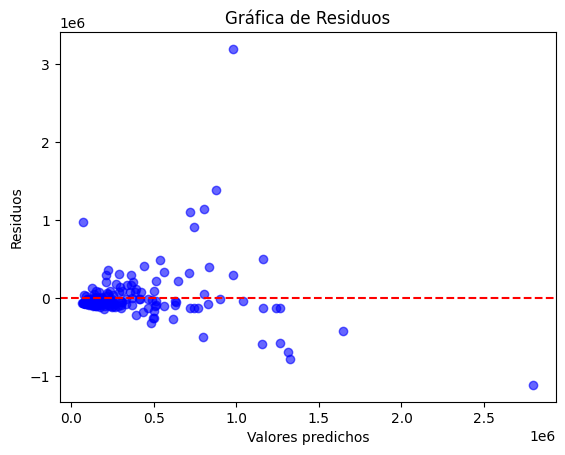

In [15]:
residuos = y_test - y_pred_test

# Graficar residuos vs valores predichos
plt.scatter(y_pred_test, residuos, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfica de Residuos")
plt.show()

## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

**respuesta**

1. Los coeficientes muestran que variables como revenues, ebit, depreciation, ncwc y bv tienen relación positiva con el valor que predice el modelo, mientras que capex tiene un efecto negativo
2. el modelo tiene un R² de 0.68 en entrenamiento y de 0.50 en prueba, lo que significa que logra explicar parte de la variabilidad, pero no toda. Eso muestra que funciona, pero no predice tan bien cuando se le dan datos nuevos, por lo que no es lo suficientemente bueno para un uso práctico.
3. En conclusión, el modelo es útil para entender relaciones básicas entre las variables, pero todavía tiene limitaciones. Sería bueno añadir más variables, probar con regresiones polinómicas si la relación no es lineal, o aplicar técnicas de regularización como Ridge o Lasso para mejorar la estabilidad y el rendimiento del modelo

### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._

**Respuestas**:
1. Parcialmente, el R² de 0.50 en prueba indica que captura una parte importante de la variabilidad, pero aún queda un 50% sin explicar. Esto sugiere que las relaciones no son totalmente lineales o faltan variables.
2. Además de la regresión lineal, yo probaría con árboles de decisión porque permiten ver reglas más claras. También usaría random forest o boosting, ya que ayudan a capturar mejor relaciones que no son lineales.
3. Creo que el dataset no es tan grande ni tan diverso como para sacar conclusiones muy fuertes. Sirve para practicar y entender el modelo, pero para tener resultados más confiables sería mejor contar con más datos

## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!